# Yiming Liu

# Problem_2

In [1]:
# (a)

import numpy as np
import matplotlib.pyplot as plt
import sys
import math
sys.path.append('/Users/yimingliu/Downloads/HW4-code/')
import mltools as ml
import mltools.dtree as mltree
%matplotlib inline

In [2]:
X = np.genfromtxt("/Users/yimingliu/Downloads/HW4-code/data/X_train.txt",delimiter=None)
Y= np.genfromtxt("/Users/yimingliu/Downloads/HW4-code/data/Y_train.txt",delimiter=None)
X_test=np.genfromtxt("/Users/yimingliu/Downloads/HW4-code/data/X_test.txt",delimiter=None)
X_train=X[0:160000,:]
Y_train=Y[0:160000]
X_vali=X[160001:200000,:]
Y_vali=Y[160001:200000]

In [454]:
# (b)
dt=mltree.treeClassify(X_train,Y_train,maxDepth=50)
predict_train=dt.predict(X_train)
predict=dt.predict(X_vali)

In [4]:
# Training error
np.sum(predict_train!=Y_train)/Y_train.shape[0]

0.012500000000000001

In [5]:
# Validation error
np.sum(predict!=Y_vali)/Y_vali.shape[0]

0.37393739373937396

In [6]:
# (c)
trainerr=[]
valierr=[]
for i in range(16):
    dt=mltree.treeClassify(X_train,Y_train, maxDepth=i)
    predict_train=dt.predict(X_train)
    predict=dt.predict(X_vali)
    terr=np.sum(predict_train!=Y_train)/Y_train.shape[0]
    verr=np.sum(predict!=Y_vali)/Y_vali.shape[0]
    trainerr.append(terr)
    valierr.append(verr)

(-1, 16)

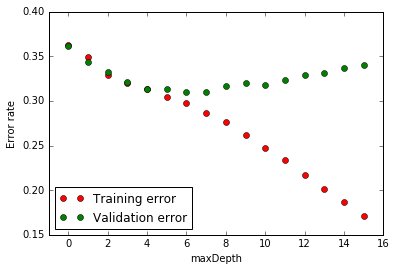

In [7]:
# plot training and validation error vs maxDepth
plt.plot(range(16),trainerr,'bo',c='red')
plt.plot(range(16),valierr,'bo',c='green')
plt.legend(['Training error', 'Validation error'], loc='lower left')
plt.xlabel('maxDepth')
plt.ylabel('Error rate')
plt.xlim([-1,16])

In [8]:
# Training error vs maxdepth
trainerr

[0.36249999999999999,
 0.34860000000000002,
 0.32890000000000003,
 0.3196,
 0.31330000000000002,
 0.30480000000000002,
 0.29749999999999999,
 0.28620000000000001,
 0.27679999999999999,
 0.26219999999999999,
 0.24759999999999999,
 0.23380000000000001,
 0.2172,
 0.20150000000000001,
 0.1862,
 0.1709]

In [9]:
# validation error vs maxdepth
valierr

[0.36153615361536151,
 0.34393439343934396,
 0.33183318331833184,
 0.32093209320932092,
 0.31303130313031302,
 0.31373137313731375,
 0.31043104310431041,
 0.30983098309830981,
 0.31613161316131611,
 0.32033203320332032,
 0.31733173317331731,
 0.32373237323732373,
 0.32873287328732875,
 0.33093309330933091,
 0.33723372337233726,
 0.34073407340734074]

From above results we can see the model with full depth has the lowest training error rate, but the highest validation error rate. The complexity is increasing with the depth cutoff since training error rate keeps decreasing as depth increases. Meanwhile, the model displays a clear overfitting, since the validation error begins increase once the depth increases past 6. Thus I would select 6 for the maxdepth if maxdepth is chosen to control the complexity, as it produces the lowest validation error rate.

In [10]:
# (d)
N=[]
for i in range(2,13):
    N.append(2**i)

In [11]:
trainerr=[]
valierr=[]
for i in N:
    dt=mltree.treeClassify(X_train,Y_train, maxDepth=50,minLeaf=i)
    predict_train=dt.predict(X_train)
    predict=dt.predict(X_vali)
    terr=np.sum(predict_train!=Y_train)/Y_train.shape[0]
    verr=np.sum(predict!=Y_vali)/Y_vali.shape[0]
    trainerr.append(terr)
    valierr.append(verr)

(0, 13)

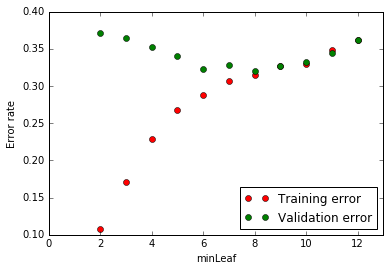

In [12]:
# plot training and validation error vs minleaf
plt.plot(range(2,13),trainerr,'bo',c='red')
plt.plot(range(2,13),valierr,'bo',c='green')
plt.legend(['Training error', 'Validation error'], loc='lower right')
plt.xlabel('minLeaf')
plt.ylabel('Error rate')
plt.xlim([0,13])

The complexity is decreasing as minleaf grows, since the training error rate keeps increasing as minleaf grows. The model seems to start overfitting when minleaf is below $2^{8}$, since the validation error begins to increase past $2^{8}$. Thus, I would use $2^{8}$ for this type of complexity control, as it achieves the lowest validation error.

In [13]:
# validation error rate vs minleaf
valierr

[0.37093709370937095,
 0.36473647364736472,
 0.35213521352135213,
 0.34013401340134014,
 0.32273227322732273,
 0.32803280328032802,
 0.31983198319831985,
 0.32723272327232722,
 0.33183318331833184,
 0.34393439343934396,
 0.36153615361536151]

In [14]:
# (f)


# Trained model
dt =mltree.treeClassify(X_train,Y_train, maxDepth=50)

# false positive rate, true positive rate and true negative rate for validation data
fpr,tpr,tnr=dt.roc(X_vali,Y_vali)


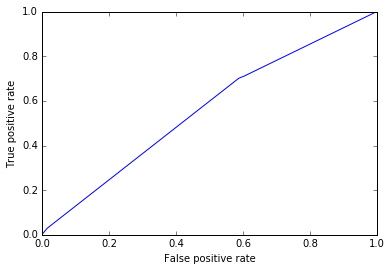

In [15]:
# plot the ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

In [16]:
# AUC using validation data
dt.auc(X_vali,Y_vali)

0.59714156154563447

In [17]:
# (g)


# Best complexity control value seems to be maxDepth=7, as it achieves the lowest validation error rate
# according to previous analysis

# retrain model with maxDepth=7
dt =mltree.treeClassify(X_train,Y_train, maxDepth=6)

# AUC using validation data
Auc_1=dt.auc(X_vali,Y_vali)
# AUC on training data
Auc_2=dt.auc(X_train,Y_train)

In [18]:
Auc_1

0.67312855530943549

In [19]:
Auc_2

0.71034024070317781

In [20]:
Ypred = dt.predictSoft( X_test )
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('DecisionTree.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred[:,1]) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',');

Above model scores 0.63889, which is close to the AUC score computed above.

# Problem_3

In [5]:
# (a)
import random
validation_error=[]
training_error=[]
number=[1,5,10,25]
features=list(range(5,8))

In [169]:
# Random forest with 1 individual decision trees
nbag=1
ensemble=[]

for i in range(nbag):
    data=ml.bootstrapData(X_train,Y_train,n_boot=X_train.shape[0])
    ensemble.append(mltree.treeClassify(data[0],data[1],maxDepth=45,minLeaf=6,nFeatures=random.choice(features)))    

In [170]:
# Prediction on validation data
mVali = X_vali.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_vali)
    # Make overall prediction by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5  
# validation error rate
verr=np.sum(prediction!=Y_vali)/Y_vali.shape[0]
validation_error.append(verr)

In [171]:
# Prediction on training data
mVali = X_train.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_train)
# Make overall prediction by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5 
# training error rate
traerr=np.sum(prediction!=Y_train)/Y_train.shape[0]
training_error.append(traerr)

In [172]:
# Random forest with 5 individual decision trees
nbag=5
ensemble=[]

for i in range(nbag):
    data=ml.bootstrapData(X_train,Y_train,n_boot=X_train.shape[0])
    ensemble.append(mltree.treeClassify(data[0],data[1],maxDepth=45,minLeaf=6,nFeatures=random.choice(features)))    

In [173]:
# Predictions on validation data
mVali = X_vali.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_vali)
    # Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5  
# validation error rate
verr=np.sum(prediction!=Y_vali)/Y_vali.shape[0]
validation_error.append(verr)

In [174]:
# Predictions on training data
mVali = X_train.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_train)
# Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5 
# training error rate
traerr=np.sum(prediction!=Y_train)/Y_train.shape[0]
training_error.append(traerr)

In [397]:
# Random forest with 10 individual decision trees
nbag=10
ensemble=[]

for i in range(nbag):
    data=ml.bootstrapData(X_train,Y_train,n_boot=X_train.shape[0])
    ensemble.append(mltree.treeClassify(data[0],data[1],maxDepth=15,minLeaf=5,nFeatures=random.choice(features))) 

In [9]:
# Predictions on validation data
mVali = X_vali.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_vali)
    # Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5  
# validation error rate
verr=np.sum(prediction!=Y_vali)/Y_vali.shape[0]
validation_error.append(verr)

In [251]:
# Predictions on training data
mVali = X_train.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_train)
# Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5 
# training error rate
traerr=np.sum(prediction!=Y_train)/Y_train.shape[0]
training_error.append(traerr)

In [7]:
# Random forest with 25 individual decision trees
nbag=25
ensemble=[]

for i in range(nbag):
    data=ml.bootstrapData(X_train,Y_train,n_boot=X_train.shape[0])
    ensemble.append(mltree.treeClassify(data[0],data[1],maxDepth=50,minLeaf=256,nFeatures=10))

In [459]:
# Predictions on validation data
mVali = X_vali.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_vali)
    # Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5  
# validation error rate
verr=np.sum(prediction!=Y_vali)/Y_vali.shape[0]
validation_error.append(verr)

In [253]:
# Predictions on training data
mVali = X_train.shape[0]
pred = np.zeros((mVali,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_train)
# Make overall predictions by majority vote
prediction= np.sum(pred, axis=1)/nbag > 0.5 
# training error rate
traerr=np.sum(prediction!=Y_train)/Y_train.shape[0]
training_error.append(traerr)

(0, 26)

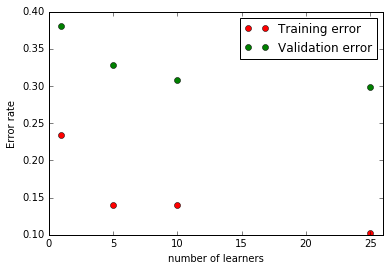

In [181]:
plt.plot(number,training_error,'bo',c='red')
plt.plot(number,validation_error,'bo',c='green')
plt.legend(['Training error', 'Validation error'], loc='upper right')
plt.xlabel('number of learners')
plt.ylabel('Error rate')
plt.xlim([0,26])

In [241]:
training_error

[0.23369999999999999,
 0.1404,
 0.1394,
 0.10249999999999999,
 0.098000000000000004,
 0.10000000000000001,
 0.099599999999999994,
 0.10349999999999999,
 0.104,
 0.1016,
 0.099299999999999999,
 0.1026,
 0.14099999999999999,
 0.1069,
 0.13780000000000001,
 0.1028,
 0.1072]

In [10]:
validation_error

[0.29360734018350459]

According to the validation error, the random forests with 25 individual learners seem to produce the optimal results. Thus I will choose ensemble size 25 for my ensemble learner.

In [11]:
# (b)
# soft Predictions on test data
mtest = X_test.shape[0]
pred = np.zeros((mtest,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predictSoft(X_test)[:,1]
# Make overall soft predictions 
Ypred= np.mean(pred, axis=1) 

In [310]:
mtest = X_test.shape[0]
pred = np.zeros((mtest,nbag)) # Allocate space for predictions from each model
for i in range(nbag):
    pred[:,i] = ensemble[i].predict(X_test)
# Make overall predictions by majority vote
Ypred= np.sum(pred, axis=1)/nbag

In [13]:
# Now output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('RandomForests11.txt',
np.vstack( (np.arange(len(Ypred)) , Ypred) ).T,
'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')